In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
import time
from datetime import datetime
from config import weather_api_key

In [2]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

614

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [7]:
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 2 of Set 1 | iwanai
Processing Record 3 of Set 1 | airai
Processing Record 4 of Set 1 | severo-kurilsk
Processing Record 5 of Set 1 | kapaa
Processing Record 6 of Set 1 | victoria
Processing Record 7 of Set 1 | san jeronimo
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | lorengau
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | nawalapitiya
Processing Record 13 of Set 1 | marienburg
Processing Record 14 of Set 1 | ketchikan
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | aleksandrovskiy zavod
Processing Record 17 of Set 1 | pacific grove
Processing Record 18 of Set 1 | chuy
Processing Record 19 of Set 1 | saint-pierre
Processing Record 20 of Set 1 | yubari
Processing Record 21 of Set 1 | talnakh
Processing Record 22 of Set 1 | kaitangata
Processing Record 23 of Set 1 | ulladulla


Processing Record 39 of Set 4 | inirida
Processing Record 40 of Set 4 | statesboro
Processing Record 41 of Set 4 | khorinsk
Processing Record 42 of Set 4 | ust-nera
Processing Record 43 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 44 of Set 4 | lazaro cardenas
Processing Record 45 of Set 4 | lerwick
Processing Record 46 of Set 4 | dawei
Processing Record 47 of Set 4 | axim
Processing Record 48 of Set 4 | urozhaynoye
Processing Record 49 of Set 4 | labuhan
Processing Record 50 of Set 4 | ijui
Processing Record 1 of Set 5 | mount gambier
Processing Record 2 of Set 5 | worland
Processing Record 3 of Set 5 | zyryanka
Processing Record 4 of Set 5 | stornoway
Processing Record 5 of Set 5 | alice springs
Processing Record 6 of Set 5 | tuktoyaktuk
Processing Record 7 of Set 5 | sovetskiy
Processing Record 8 of Set 5 | vadinsk
Processing Record 9 of Set 5 | xiongzhou
Processing Record 10 of Set 5 | ilulissat
Processing Record 11 of Set 5 | san andres
Processing Record 12 of

Processing Record 30 of Set 8 | zainsk
Processing Record 31 of Set 8 | necochea
Processing Record 32 of Set 8 | batticaloa
Processing Record 33 of Set 8 | laguna
Processing Record 34 of Set 8 | cubuk
Processing Record 35 of Set 8 | mujiayingzi
Processing Record 36 of Set 8 | tautira
Processing Record 37 of Set 8 | alice town
Processing Record 38 of Set 8 | kyra
Processing Record 39 of Set 8 | zemio
Processing Record 40 of Set 8 | yuksekova
Processing Record 41 of Set 8 | grand gaube
Processing Record 42 of Set 8 | samalaeulu
City not found. Skipping...
Processing Record 43 of Set 8 | aden
Processing Record 44 of Set 8 | kormilovka
Processing Record 45 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 46 of Set 8 | vitimskiy
City not found. Skipping...
Processing Record 47 of Set 8 | nishihara
Processing Record 48 of Set 8 | balkanabat
Processing Record 49 of Set 8 | rocha
Processing Record 50 of Set 8 | puerto madero
Processing Record 1 of Set 9 | dalbandin
Process

Processing Record 14 of Set 12 | mao
Processing Record 15 of Set 12 | moerai
Processing Record 16 of Set 12 | hofn
Processing Record 17 of Set 12 | aykhal
Processing Record 18 of Set 12 | zhigansk
Processing Record 19 of Set 12 | honiara
Processing Record 20 of Set 12 | gejiu
Processing Record 21 of Set 12 | dabola
Processing Record 22 of Set 12 | melilla
Processing Record 23 of Set 12 | basco
Processing Record 24 of Set 12 | saint-leu
Processing Record 25 of Set 12 | sibolga
Processing Record 26 of Set 12 | tarauaca
Processing Record 27 of Set 12 | binga
Processing Record 28 of Set 12 | karasjok
Processing Record 29 of Set 12 | hovd
Processing Record 30 of Set 12 | preston
Processing Record 31 of Set 12 | acarau
Processing Record 32 of Set 12 | santa marta
Processing Record 33 of Set 12 | cozumel
Processing Record 34 of Set 12 | tamale
Processing Record 35 of Set 12 | carinhanha
Processing Record 36 of Set 12 | aljezur
Processing Record 37 of Set 12 | juegang
Processing Record 38 of S

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Iwanai,42.9744,140.5089,23.02,84,100,12.41,JP,2022-02-03 19:43:02
1,Airai,-8.9266,125.4092,60.80,94,100,2.66,TL,2022-02-03 19:43:02
2,Severo-Kurilsk,50.6789,156.1250,29.95,88,100,7.78,RU,2022-02-03 19:41:56
3,Kapaa,22.0752,-159.3190,75.47,71,0,1.01,US,2022-02-03 19:43:03
4,Victoria,22.2855,114.1577,55.33,85,92,7.00,HK,2022-02-03 19:43:04
5,San Jeronimo,-11.9472,-75.2829,62.44,56,78,6.29,PE,2022-02-03 19:43:04
6,Punta Arenas,-53.1500,-70.9167,50.02,53,0,4.61,CL,2022-02-03 19:43:05
7,Mataura,-46.1927,168.8643,51.48,99,100,1.88,NZ,2022-02-03 19:40:51
8,Lorengau,-2.0226,147.2712,79.20,80,100,6.17,PG,2022-02-03 19:40:31
9,Jamestown,42.0970,-79.2353,32.09,51,100,12.66,US,2022-02-03 19:38:13


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


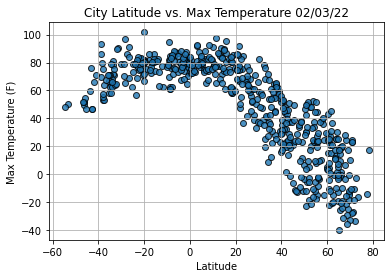

In [11]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

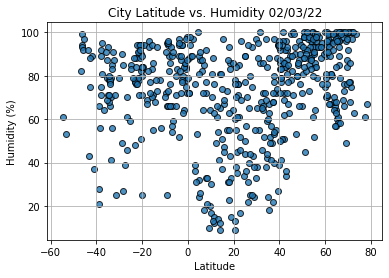

In [12]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

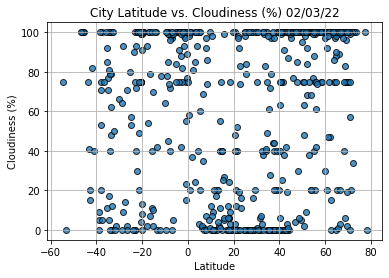

In [13]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

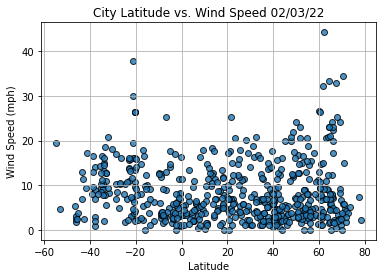

In [14]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [15]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [16]:
index13 = city_data_df.loc[13]
index13

City                      Ushuaia
Lat                         -54.8
Lng                         -68.3
Max Temp                    47.82
Humidity                       61
Cloudiness                     75
Wind Speed                  19.57
Country                        AR
Date          2022-02-03 19:39:54
Name: 13, dtype: object

In [17]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3       True
4       True
       ...  
562     True
563     True
564    False
565     True
566     True
Name: Lat, Length: 567, dtype: bool

In [18]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Iwanai,42.9744,140.5089,23.02,84,100,12.41,JP,2022-02-03 19:43:02
2,Severo-Kurilsk,50.6789,156.1250,29.95,88,100,7.78,RU,2022-02-03 19:41:56
3,Kapaa,22.0752,-159.3190,75.47,71,0,1.01,US,2022-02-03 19:43:03
4,Victoria,22.2855,114.1577,55.33,85,92,7.00,HK,2022-02-03 19:43:04
9,Jamestown,42.0970,-79.2353,32.09,51,100,12.66,US,2022-02-03 19:38:13


In [19]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

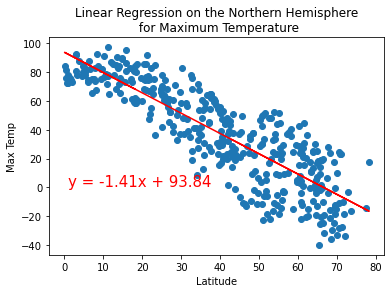

In [20]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for Maximum Temperature', 'Max Temp',(1,1))


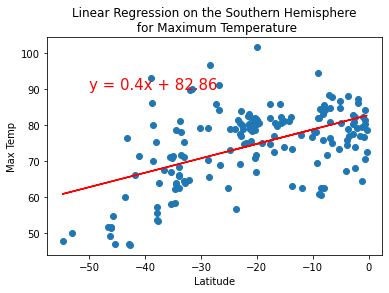

In [21]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for Maximum Temperature', 'Max Temp',(-50,90))

In [22]:
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Iwanai,42.9744,140.5089,23.02,84,100,12.41,JP,2022-02-03 19:43:02
2,Severo-Kurilsk,50.6789,156.1250,29.95,88,100,7.78,RU,2022-02-03 19:41:56
3,Kapaa,22.0752,-159.3190,75.47,71,0,1.01,US,2022-02-03 19:43:03
4,Victoria,22.2855,114.1577,55.33,85,92,7.00,HK,2022-02-03 19:43:04
9,Jamestown,42.0970,-79.2353,32.09,51,100,12.66,US,2022-02-03 19:38:13


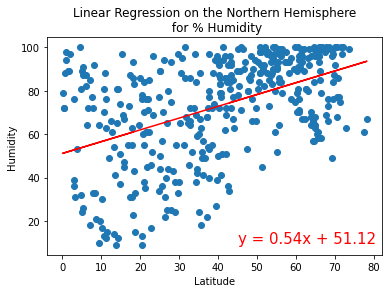

In [23]:
# Linear regression on the Northern Hemisphere Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere\n for % Humidity", 'Humidity',(45,10))

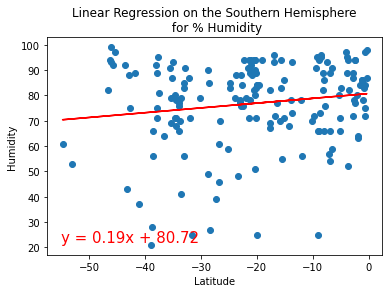

In [24]:
# Linear regression on the Southern Hemisphere Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere\n for % Humidity", 'Humidity',(-55,22))

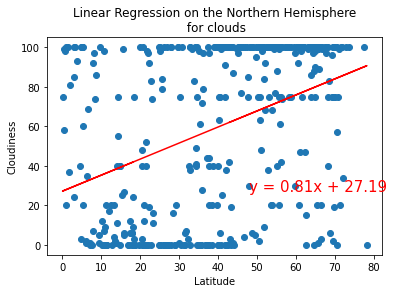

In [25]:
# Linear regression on the Southern Hemisphere Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere\n for clouds", 'Cloudiness',(48,27))

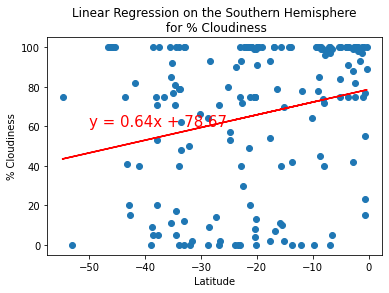

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for % Cloudiness', '% Cloudiness',(-50,60))


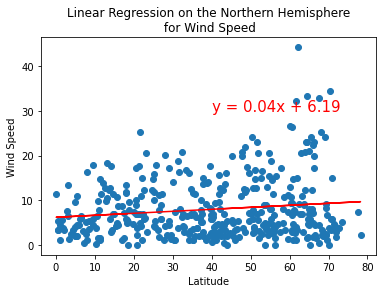

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for Wind Speed', 'Wind Speed',(40,30))

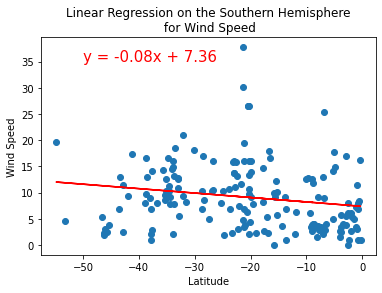

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for Wind Speed', 'Wind Speed',(-50,35))